# Analysis ACM - Analyse de correspondance multiple

permet de traiter  simultan√©ment un nombre quelconque de variables, toutes  qualitatives.

# Author: Ricardo Vallejo R.

# 1. Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
from fanalysis.mca import MCA

dataOriginal = pd.read_excel("Chiens.xlsx",sheet_name="Feuil1",index_col=0)
pd.set_option('display.max_rows', None)
n_data = dataOriginal.shape[0]
dataOriginal


Taille Velocite Affection  Cote   Fonction
Chien                                                    
Beauceron    Taille++  Veloc++    Affec+   2.0    utilite
Basset         Taill-    Velo-     Affe-   4.5     chasse
Berger All   Taille++  Veloc++    Affec+   2.5    utilite
Boxer         Taille+   Veloc+    Affec+   3.0  compagnie
Bull-Dog       Taill-    Velo-    Affec+   1.5  compagnie
Bull-Mastif  Taille++    Velo-     Affe-   1.0    utilite
Caniche        Taill-   Veloc+    Affec+   4.0  compagnie
Labrador      Taille+   Veloc+    Affec+   3.5     chasse

In [10]:
label_categoricals = ['Taille','Velocite','Affection']

# 2 . Tableau disjonctif complet (TDC)

In [21]:
X = pd.get_dummies(dataOriginal[label_categoricals],prefix='',prefix_sep='')
print(X)

             Taill-  Taille+  Taille++  Velo-  Veloc+  Veloc++  Affe-  Affec+
Chien                                                                        
Beauceron         0        0         1      0       0        1      0       1
Basset            1        0         0      1       0        0      1       0
Berger All        0        0         1      0       0        1      0       1
Boxer             0        1         0      0       1        0      0       1
Bull-Dog          1        0         0      1       0        0      0       1
Bull-Mastif       0        0         1      1       0        0      1       0
Caniche           1        0         0      0       1        0      0       1
Labrador          0        1         0      0       1        0      0       1


In [22]:
#nombre total de modalit√©s
m = X.shape[1]
m

8

# 3. D√©termination du profil profil-moyen

In [44]:
n = dataOriginal.shape[0] #Numeor individus
p = dataOriginal.shape[1] #Only categorical variables

somme_col = np.sum(X.values,axis=0)
print('Le profil colonne:',somme_col/(n*p))


Le profil colonne: [0.075000 0.050000 0.075000 0.075000 0.075000 0.050000 0.050000 0.150000]


In [52]:
p

5

# 3.1 La matrice des profils-lignes L

Est le vecteur des poids des modalit¬¥es (aussi appel¬¥e profil-moyen)

In [244]:
p_retenidas=3

L = X / p_retenidas
L.round(2)

Taill-  Taille+  Taille++  Velo-  Veloc+  Veloc++  Affe-  Affec+
Chien                                                                        
Beauceron      0.00     0.00      0.33   0.00    0.00     0.33   0.00    0.33
Basset         0.33     0.00      0.00   0.33    0.00     0.00   0.33    0.00
Berger All     0.00     0.00      0.33   0.00    0.00     0.33   0.00    0.33
Boxer          0.00     0.33      0.00   0.00    0.33     0.00   0.00    0.33
Bull-Dog       0.33     0.00      0.00   0.33    0.00     0.00   0.00    0.33
Bull-Mastif    0.00     0.00      0.33   0.33    0.00     0.00   0.33    0.00
Caniche        0.33     0.00      0.00   0.00    0.33     0.00   0.00    0.33
Labrador       0.00     0.33      0.00   0.00    0.33     0.00   0.00    0.33

In [245]:
labels = ['Taill-', 'Taille+','Taille++','Velo-','Veloc+', 'Veloc++', 'Affe-', 'Affec+']
labels = X.columns

# 3.1 La matrice des profils-lignes columns C 

In [ ]:
class_x_modalite = [ 3 3 3 3 3 3 2 2]

In [115]:
C = X / class_x_modalite

NameError: name 'class_x_modalite' is not defined

# 4. Analyse ACM


In [45]:
acm = MCA(row_labels=dataOriginal.index,var_labels=label_categoricals)
acm.fit(dataOriginal[label_categoricals].values)
None

In [46]:
Fmax = m-p
print('Le nombre maximum de facteurs principaux est √©gal √†', Fmax)

Le nombre maximum de facteurs principaux est √©gal √† 3


In [47]:
 np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [48]:
acm.eig_

array([[0.708031, 0.591489, 0.261992, 0.069747, 0.035408],
       [42.481875, 35.489362, 15.719509, 4.184791, 2.124462],
       [42.481875, 77.971237, 93.690746, 97.875538, 100.000000]])

In [49]:
pd.DataFrame(np.transpose(acm.eig_),columns=['Val.P','%','Cumul %'], index=[1,2,3,4,5])

      Val.P          %     Cumul %
1  0.708031  42.481875   42.481875
2  0.591489  35.489362   77.971237
3  0.261992  15.719509   93.690746
4  0.069747   4.184791   97.875538
5  0.035408   2.124462  100.000000


La matrice pr√©c√©dente montre que la valeur de l'inertie cumul√©e est de 77.97% si on consid√®re les deux premiers facteurs
principaux

Les (H = 2) premiers facteurs seraient donc les seules pertinentes avec des variances √©gales respectivement 
√† 0.708031 et 0.591489. Ils restituent 77.97% de l‚Äôinformation disponible.

# 5. Nombres de facteurs √† retenir en se basant sur la r√®gle de Kaiser

In [53]:
p_retenidas = 3

Lambda_min = 1/p_retenidas
print('Lambda_min est √©gal √†', Lambda_min)

Lambda_min est √©gal √† 0.3333333333333333


Selon la r√®gle de Kaiser, on doit retenir les facteurs principaux dont les valeurs propres sont > √† 1/p = 0.33 (Diapo 33). On retient donc les deux premiers facteurs principaux

On va retenir 1 et 2.

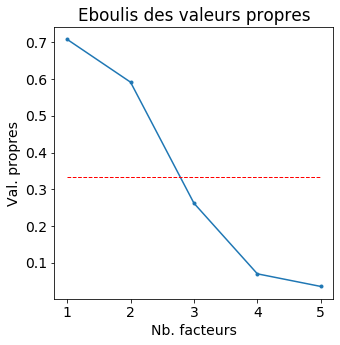

In [235]:
Fmax = 5
fix,ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,Fmax+1),acm.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#seuil - R√®gle de Kaiser
ax.plot([1,Fmax],[Lambda_min,Lambda_min],"r--",linewidth=1)
plt.show()

# 6. Nombres de facteurs √† retenir en se basant sur la r√®gle de coude

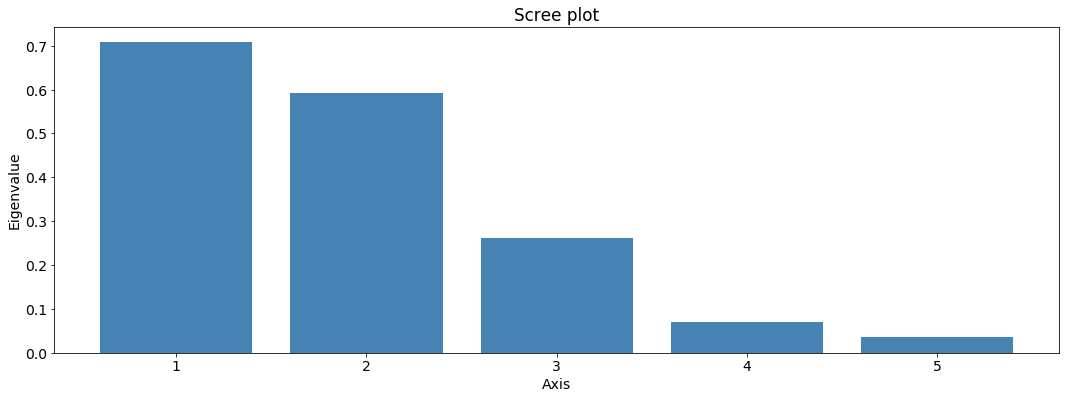

In [236]:
plt.rcParams.update({'font.size': 14})
acm.plot_eigenvalues()


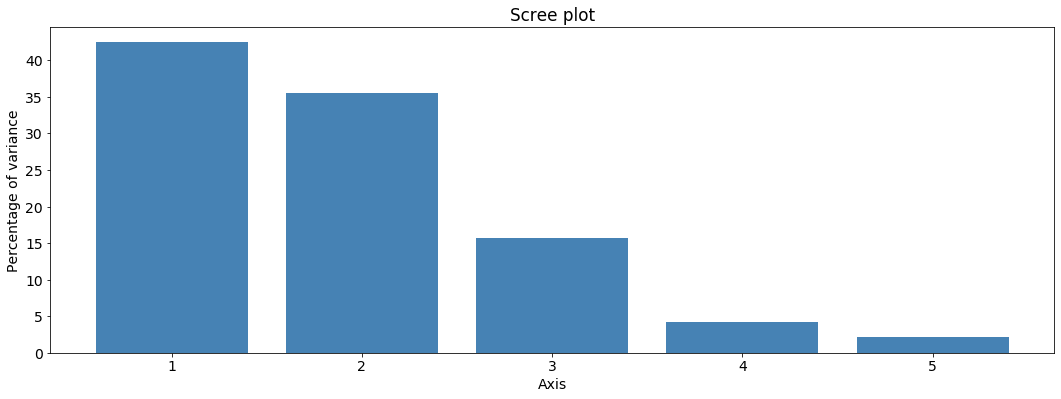

In [237]:
plt.rcParams.update({'font.size': 14})
acm.plot_eigenvalues(type="percentage")

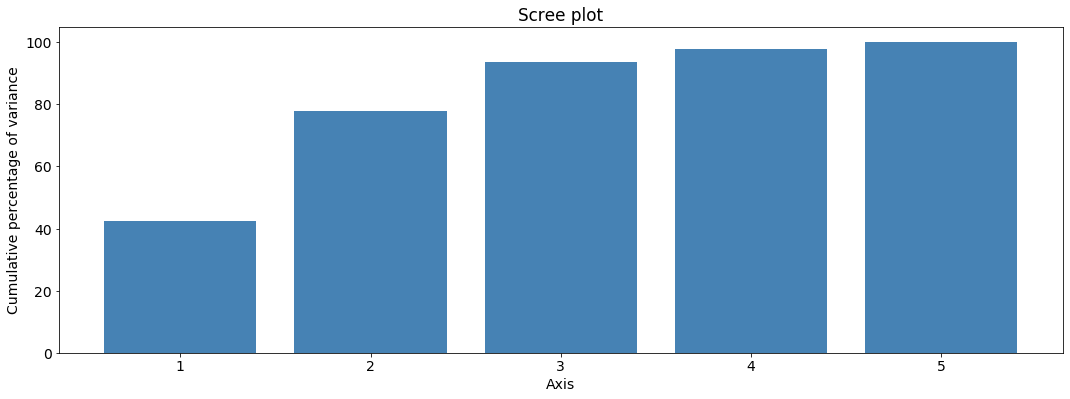

In [238]:
plt.rcParams.update({'font.size': 14})
acm.plot_eigenvalues(type="cumulative")

# 7.  R√©pr√©sentation des modalit√©s dans le plan factoriel

In [239]:

print(pd.DataFrame(acm.col_coord_[:,:2].round(2),index=X.columns,columns=['Coord.F1','Coord.F2']))
np.set_printoptions(formatter={'float_kind':'{:3f}'.format})

          Coord.F1  Coord.F2
Taill-        0.46      0.79
Taille+      -1.37      0.50
Taille++      0.46     -1.12
Velo-         1.08      0.55
Veloc+       -1.08      0.55
Veloc++       0.00     -1.66
Affe-         1.37      0.50
Affec+       -0.46     -0.17


Le tableau suivant donne la projection des modalit√©s sur les deux premiers facteurs principaux

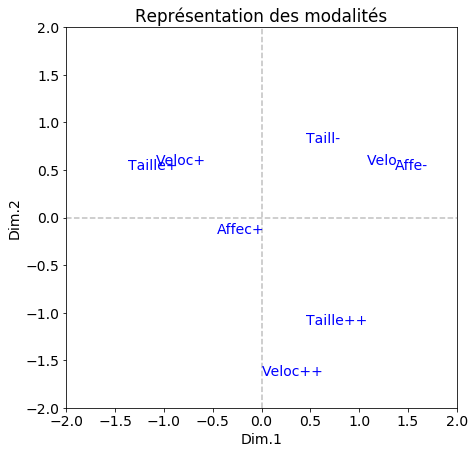

In [240]:
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Repr√©sentation des modalit√©s")
for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='blue')
plt.show()


- La repr√©sentation des modalit√©s permet d'extraire les connaissances suivantes:
- On observe trois groupes de variables reli√©s: (Velo-, Affec-), (Taille++, Veloc++) et (Taille+, Veloc+).
- Affec+ est une variable un peu isol√©e.

# 8.  R√©pr√©sentation des individus dans le plan factoriel

In [76]:
print(pd.DataFrame(acm.row_coord_[:,:2].round(2),index=X.columns,columns=['Coord.F1','Coord.F2']))

          Coord.F1  Coord.F2
Taill-        0.00     -1.28
Taille+       1.15      0.80
Taille++      0.00     -1.28
Velo-        -1.15      0.39
Veloc+        0.43      0.51
Veloc++       1.15     -0.03
Affe-        -0.43      0.51
Affec+       -1.15      0.39


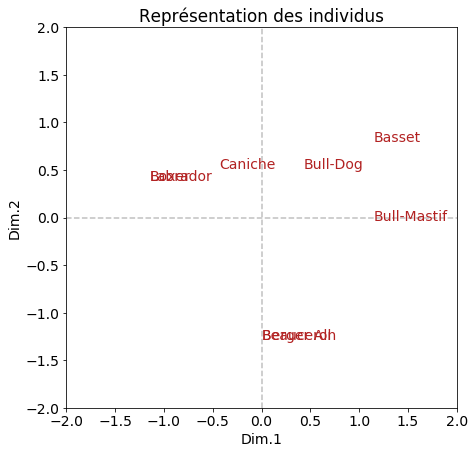

In [77]:
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Repr√©sentation des individus")
for i in range(X.shape[0]):
 ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')

plt.show()

- La repr√©sentation des individus permet d'extraire les connaissances suivantes:
- On observe deux paires d'individus superpos√©es : (Boxer, Labrador) et (Beauceron, Berger All).
- Les caract√©ristiques du Caniche est plus proche de Basset que le Beauceron.
- Le bull-Massif semble contibuer fortement au 1er axe factoriel.

# 10. Contribution des individus

In [84]:
print(pd.DataFrame(acm.row_contrib_[:,:2].round(2),index=X.index,columns=['Contrib.F1','Contrib.F2']))

             Contrib.F1  Contrib.F2
Chien                              
Beauceron          0.00       34.62
Basset            23.38       13.49
Berger All         0.00       34.62
Boxer             23.38        3.13
Bull-Dog           3.24        5.49
Bull-Mastif       23.38        0.02
Caniche            3.24        5.49
Labrador          23.38        3.13


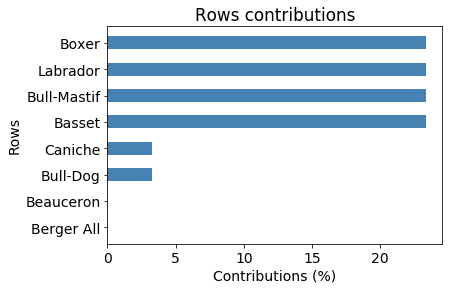

In [85]:
acm.plot_row_contrib(num_axis=1)

# 11.  Repr√©sentation simultann√©e des modalit√©s et des individus

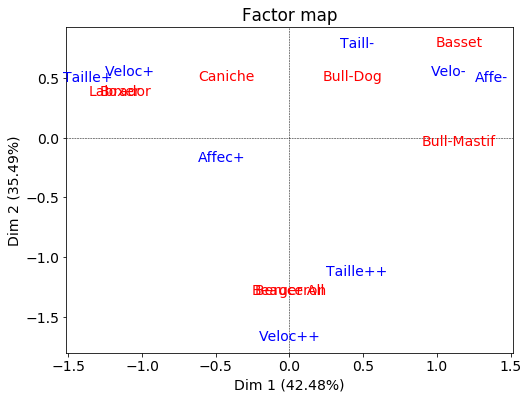

In [87]:
#repr√©sentation dans le plan
acm.mapping(num_x_axis=1,num_y_axis=2,figsize=(8,6))

# 12. Adding suplementaire donne

In [88]:
DSupp = pd.read_excel("Chiens.xlsx",sheet_name="Feuil2",index_col=0)
print(DSupp)

           Taille Velocite Affection
Chien                               
Levrier  Taille++  Veloc++     Affe-


In [105]:
#codage 0/1 de l'individu supp
#vecteur pour individu suppl√©mentaire

XSupp = np.zeros(m)

for v in DSupp.loc['Levrier'].values:
    XSupp[np.where(X.columns==v)] = 1
    
XSupp

array([0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000,
       1.000000, 0.000000])

In [106]:
p_retenus = 3

XSupp = XSupp / p_retenus
print(XSupp)

[0.000000 0.000000 0.333333 0.000000 0.000000 0.333333 0.333333 0.000000]


In [107]:
p

5

# 12.1 Projection d'individu supplementaire 

In [109]:
coord_supp = np.dot(np.reshape(XSupp,(1,m)),acm.col_coord_[:,:2])
coord_supp = coord_supp / np.sqrt(acm.eig_[0][:2])
print(coord_supp)

[[0.722366 -0.990542]]


# 12.2 Repr√©sentation dans le plan factoriel

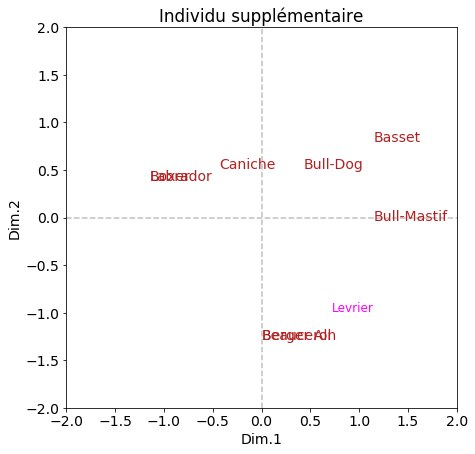

In [110]:
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Individu suppl√©mentaire")
#individus actifs
for i in range(X.shape[0]):
 ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')
#individu suppl√©mentaire
ax.text(coord_supp[0][0],coord_supp[0][1],'Levrier',color='magenta',fontsize=12)
plt.show()

- Le levier est situ√© dans le voisinage du Berger All et du Beauceron.
- Le retour aux donn√©es initiale montre que ces trois races partagent les caract√©ristiques suivantes : Taille ++, Velocite++.

# 13. Distance entre individus

In [141]:
X

Taill-  Taille+  Taille++  Velo-  Veloc+  Veloc++  Affe-  Affec+
Chien                                                                        
Beauceron         0        0         1      0       0        1      0       1
Basset            1        0         0      1       0        0      1       0
Berger All        0        0         1      0       0        1      0       1
Boxer             0        1         0      0       1        0      0       1
Bull-Dog          1        0         0      1       0        0      0       1
Bull-Mastif       0        0         1      1       0        0      1       0
Caniche           1        0         0      0       1        0      0       1
Labrador          0        1         0      0       1        0      0       1

In [142]:
# Deux individus sont proches s‚Äôils poss`edent les mÀÜeme modalit¬¥es
# Puisque nous traitons des variables cat√©gorielles, nous utilisons la distance du ùúí2 qui a pour particularit√© d‚Äôexacerber 
# les diff√©rences entre les modalit√©s rares

import numpy 
p=3   # !Atention cest p_retenidas

#profil individu moyen 
ind_moy = numpy.sum(X.values,axis=0)/(n*p) 
print(ind_moy) 



[0.125000 0.083333 0.125000 0.125000 0.125000 0.083333 0.083333 0.250000]


In [143]:
#distance du KHI-2 entre beauceron (n¬∞0) et basset (n¬∞1) 
numpy.sum(1/ind_moy*(X.values[0,:]/p-X.values[1,:]/p)**2)



5.777777777777777

In [140]:
#idem entre basset(n¬∞1) et caniche(n¬∞6) 
numpy.sum(1/ind_moy*(X.values[1,:]/p-X.values[6,:]/p)**2)


3.5555555555555554

Entre plus petites plus des choses en common.

Visiblement, le Basset a plus de caract√®res en commun avec le Caniche qu‚Äôavec le Beauceron

# 14.  Distance entre modalites

In [139]:
somme_col = numpy.sum(X.values,axis=0) 
somme_col

array([3, 2, 3, 3, 3, 2, 2, 6], dtype=uint32)

In [138]:
#distance entre taille- (2) et velocite- (5) 
numpy.sum(n*((X.values[:,2]/somme_col[2]-X.values[:,5]/somme_col[5])**2))

1.3333333333333335

In [137]:
#distance entre taille- (2) et velocite+ (3) 
numpy.sum(n*((X.values[:,2]/somme_col[2]-X.values[:,3]/somme_col[3])**2))

3.5555555555555554

- Conclusion : les individus qui partagent les caract√©ristiques (taille-, v√©locit√©-) sont plus nombreux que (taille-, v√©locit√©+).

# 15. Inertia Total

In [128]:
#profil moyen des variables-modalit√©s 

somme_col = numpy.sum(X.values,axis=0)
poids_moda = somme_col/(n*p)

moda_moy = numpy.ones(X.shape[0])/n
disto_moda = numpy.apply_along_axis(arr=X.values/somme_col,axis=0,func1d=lambda x:numpy.sum(n*(x-moda_moy)**2))

#inertie 
inertie_moda = poids_moda * disto_moda

#inertie totale des points-modalit√©s 
inertie_tot_moda = numpy.sum(inertie_moda)


In [136]:
#affichage 
pd.DataFrame(numpy.transpose([poids_moda,disto_moda,inertie_moda]),index=X.columns,columns=['Poids','Disto','Inertie'])

Poids     Disto   Inertie
Taill-    0.125000  1.666667  0.208333
Taille+   0.083333  3.000000  0.250000
Taille++  0.125000  1.666667  0.208333
Velo-     0.125000  1.666667  0.208333
Veloc+    0.125000  1.666667  0.208333
Veloc++   0.083333  3.000000  0.250000
Affe-     0.083333  3.000000  0.250000
Affec+    0.250000  0.333333  0.083333

In [132]:
#inertie totale des points-modalit√©s 
inertie_tot_moda = numpy.sum(inertie_moda) 
print(inertie_tot_moda)

1.6666666666666665


In [ ]:
# Nous constatons de surcro√Æt que les modalit√©s (Taille+, Veloc++, Affec-) 
# sont celles qui contribuent le plus √† l‚Äôinformation globale.

# 15. Contribution de modalites 

In [ ]:
# Du a nature binaire est difficile concentrer inertia sur certaines axes factorielles 

In [230]:
contribucion_modalites = acm.col_contrib_.round(2)

contribucion_modalitesDf = pd.DataFrame(contribucion_modalites, columns = ['F1', 'F2', 'F3', 'F4', 'F5'],index=X.columns )
contribucion_modalitesDf


F1     F2     F3     F4     F5
Taill-     3.67  13.13  38.68   2.58   4.44
Taille+   22.01   3.53  22.25  15.49  11.72
Taille++   3.67  26.60   5.61   2.58  24.04
Velo-     20.65   6.50   0.48  29.35   5.52
Veloc+    20.65   6.50   0.48  29.35   5.52
Veloc++    0.00  39.02   2.85   0.00  33.13
Affe-     22.01   3.53  22.25  15.49  11.72
Affec+     7.34   1.18   7.42   5.16   3.91

In [231]:
#affichage des contributions only premiers 3
pd.DataFrame(acm.col_contrib_[:,:3].round(2),index=X.columns,columns=['Contrib.F1','Contrib.F2','Contrib.F3'])

Contrib.F1  Contrib.F2  Contrib.F3
Taill-          3.67       13.13       38.68
Taille+        22.01        3.53       22.25
Taille++        3.67       26.60        5.61
Velo-          20.65        6.50        0.48
Veloc+         20.65        6.50        0.48
Veloc++         0.00       39.02        2.85
Affe-          22.01        3.53       22.25
Affec+          7.34        1.18        7.42

Sans surprises, les modalit√©s situ√©es aux extr√©mit√©s du rep√®re sont les plus influentes.
Le premier facteur est d√©termin√© par l‚Äôopposition (Taille+, V√©locit√©+) vs. (V√©locit√©-, Affection-).

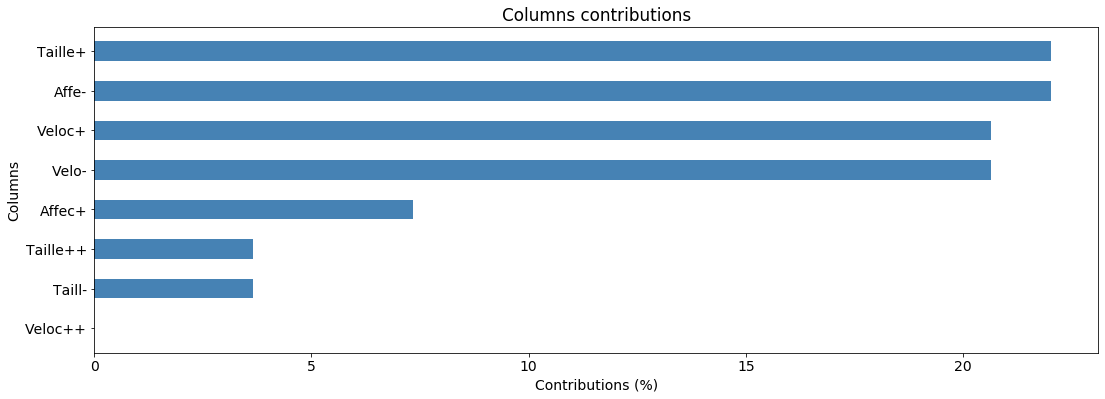

In [232]:
#ou bien graphiquement Pour le 1er facteur :
acm.plot_col_contrib(num_axis=1)

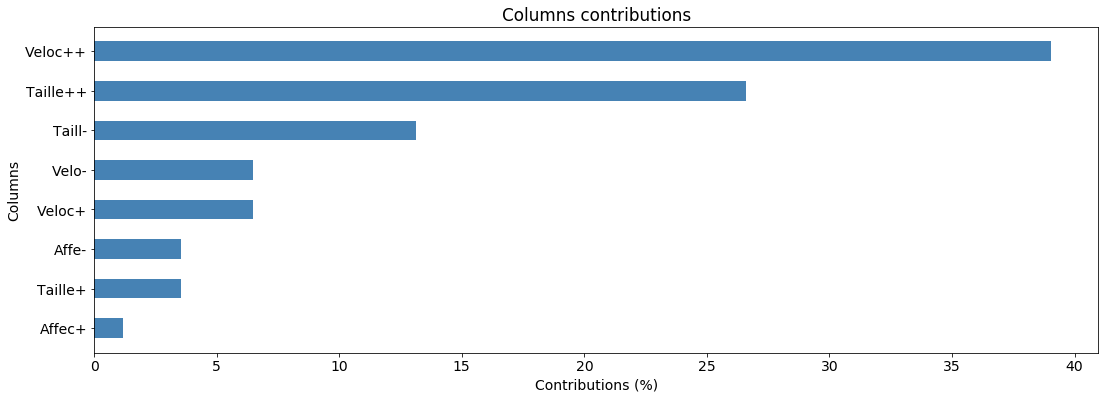

In [233]:
#ou bien graphiquement Pour le 2eme facteur :
acm.plot_col_contrib(num_axis=2)

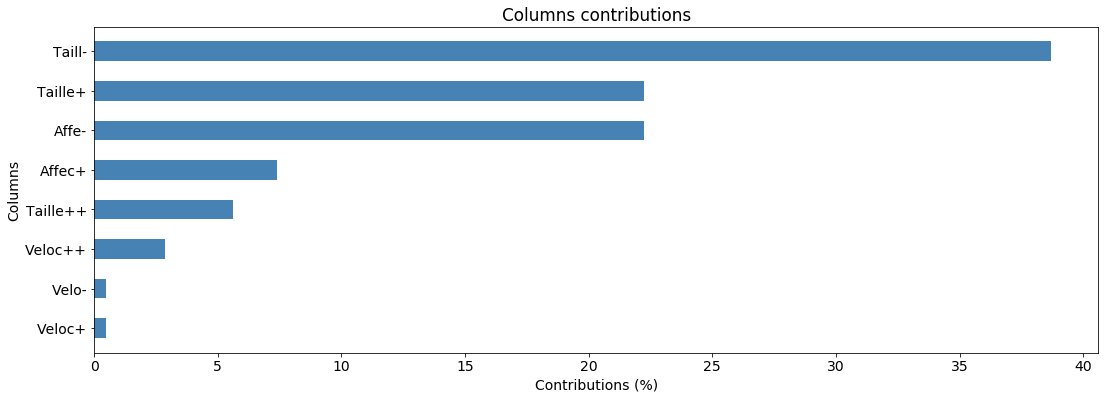

In [234]:
#ou bien graphiquement Pour le 3eme facteur :
acm.plot_col_contrib(num_axis=3)

# All in the same graphique

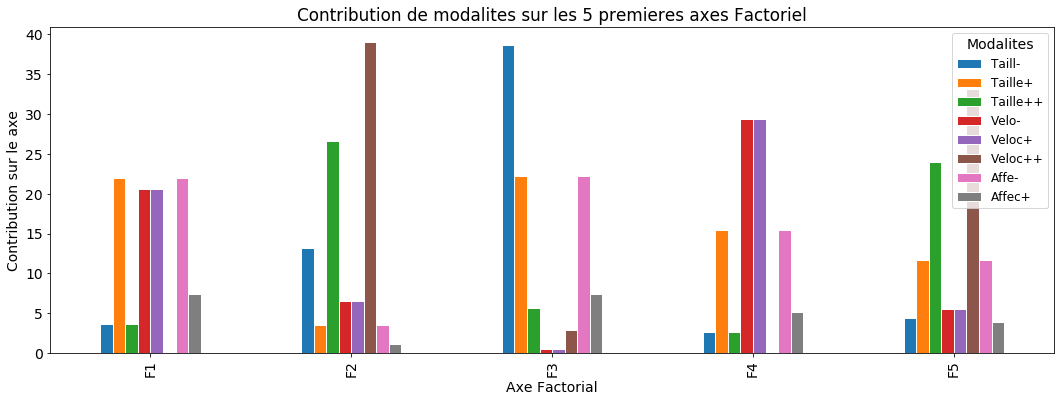

In [229]:

contribucion_modalitesDf.T.plot.bar(edgecolor = 'white') #Transpose 

plt.rcParams["figure.figsize"] = (18, 6)
plt.title('Contribution de modalites sur les 5 premieres axes Factoriel',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Axe Factorial',color = 'black')
plt.ylabel('Contribution sur le axe',color = 'black')
plt.legend(title = 'Modalites', fontsize = 12)
plt.show()

In [ ]:
# Correction de Benz¬¥ecri (6)

In [251]:
#r√©cup√©rer les valeurs propres sup√©rieur √† (1/p) 
lmbda = acm.eig_[0][acm.eig_[0]>1/p] 
print(lmbda) 



[0.708031 0.591489]


In [252]:
#appliquer la correction 
lambda_prim = ((p/(p-1))*(lmbda-1/p))**2 
print(lambda_prim)

[0.315897 0.149950]


In [253]:
#faire la somme 
S_prim = np.sum(lambda_prim) 
print(S_prim)

0.4658469098168333


In [257]:
#et produire les pourcentages 
percent_prim = lambada_prim/S_prim*100 

#affichage 
pd.DataFrame(numpy.transpose(numpy.array([lambda_prim,percent_prim,numpy.cumsum(percent_prim)])),
             columns=['Val.P','%','Cumul %'],index=range(1,3))

Val.P          %     Cumul %
1  0.315897  67.811269   67.811269
2  0.149950  32.188731  100.000000